In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds


%matplotlib inline  

In [2]:
# insert some logging
import logging
import logging.config

# remove the notebook root logger.
logger = logging.getLogger()
logger.handlers = []

# set default level
logging.basicConfig(level=logging.INFO)

In [3]:
b1 = tsds.load_ozone()
df = b1.mPastData

     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


In [4]:
df.head()

,Month,Ozone,Time
0,1955-01,2.7,1955-01-01
1,1955-02,2.0,1955-02-01
2,1955-03,3.6,1955-03-01
3,1955-04,5.0,1955-04-01
4,1955-05,6.5,1955-05-01


In [5]:
df.describe()

,Ozone
count,204.000000
mean,3.835784
std,1.495228
min,1.200000
25%,2.600000
50%,3.750000
75%,4.825000
max,8.700000


In [6]:

lEngine = autof.cForecastEngine()
lEngine.mOptions.mParallelMode = False;
lEngine.mOptions.mEnableRNNModels = True;
lEngine

#lEngine.mOptions.enable_slow_mode()
#lEngine.mOptions.mCycle_Criterion = "L2";
#lEngine.mOptions.mCycle_Criterion_Threshold = 10000.2;
        

In [7]:
lEngine.train(df , 'Time' , 'Ozone', 12)

INFO:pyaf.std:START_TRAINING 'Ozone'


ESTIMATE_RNN_MODEL_START _Ozone_PolyTrend_residue_bestCycle_byL2_residue


Using Theano backend.


ESTIMATE_RNN_MODEL_END _Ozone_PolyTrend_residue_bestCycle_byL2_residue_LSTM(51)
ESTIMATE_RNN_MODEL_START _Ozone_PolyTrend_residue_bestCycle_byL2_residue
ESTIMATE_RNN_MODEL_END _Ozone_PolyTrend_residue_bestCycle_byL2_residue_MLP(51)
ESTIMATE_RNN_MODEL_START _Ozone_Lag1Trend_residue_Seasonal_MonthOfYear_residue
ESTIMATE_RNN_MODEL_END _Ozone_Lag1Trend_residue_Seasonal_MonthOfYear_residue_LSTM(51)
ESTIMATE_RNN_MODEL_START _Ozone_Lag1Trend_residue_Seasonal_MonthOfYear_residue
ESTIMATE_RNN_MODEL_END _Ozone_Lag1Trend_residue_Seasonal_MonthOfYear_residue_MLP(51)
ESTIMATE_RNN_MODEL_START _Ozone_ConstantTrend_residue_zeroCycle_residue
ESTIMATE_RNN_MODEL_END _Ozone_ConstantTrend_residue_zeroCycle_residue_LSTM(51)
ESTIMATE_RNN_MODEL_START _Ozone_ConstantTrend_residue_zeroCycle_residue
ESTIMATE_RNN_MODEL_END _Ozone_ConstantTrend_residue_zeroCycle_residue_MLP(51)
ESTIMATE_RNN_MODEL_START _Ozone_Lag1Trend_residue_bestCycle_byL2_residue
ESTIMATE_RNN_MODEL_END _Ozone_Lag1Trend_residue_bestCycle_byL2_re

INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Ozone' 272.17447447776794


In [8]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='Time' TimeMin=1955-01-01 00:00:00 TimeMax=1967-09-01 00:00:00 TimeDelta=30 days 10:25:15.789473 Estimation = (0 , 153) Validation = (153 , 192) Test = (192 , 204) Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Ozone' Min=1.2 Max=8.7  Mean=3.83578431373 StdDev=1.49155921594
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51)' [ConstantTrend + Seasonal_MonthOfYear + MLP(51)]
INFO:pyaf.std:TREND_DETAIL '_Ozone_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear' [Seasonal_MonthOfYear]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51)' [MLP(51)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.1745 MAPE_Forecast=0.1708 MAPE_Test=0.1679
INFO:pyaf.std:MODEL_L2 L2_Fit=0.856468397209 L2_Forecast=0.674872470161 L2_Test=0.460811489513
INFO:pyaf.std:MODEL_COMPLEXITY 55

In [9]:
type1 = np.dtype(df.Time)


In [10]:
type1.kind

'M'

In [11]:
lEngine.mSignalDecomposition.mTrPerfDetails.head(14)

,Transformation,Model,Complexity,FitCount,FitL2,FitMAPE,ForecastCount,ForecastL2,ForecastMAPE,TestCount,TestL2,TestMAPE
41,_Ozone,_Ozone_LinearTrend_residue_Seasonal_MonthOfYea...,20,153,0.896389,0.1865,39,0.641888,0.1796,12,0.678665,0.2567
3,_Ozone,_Ozone_LinearTrend_residue_bestCycle_byL2_resi...,24,153,0.896389,0.1865,39,0.641888,0.1796,12,0.678665,0.2567
22,_Ozone,_Ozone_PolyTrend_residue_zeroCycle_residue_MLP...,67,153,0.924430,0.1907,39,0.660720,0.1761,12,0.363398,0.1100
12,_Ozone,_Ozone_ConstantTrend_residue_zeroCycle_residue...,51,153,0.929299,0.1920,39,0.662870,0.1831,12,0.372741,0.1150
28,_Ozone,_Ozone_LinearTrend_residue_zeroCycle_residue_M...,67,153,0.924907,0.1905,39,0.664863,0.1685,12,0.352461,0.1206
21,_Ozone,_Ozone_PolyTrend_residue_Seasonal_MonthOfYear_...,71,153,0.850663,0.1740,39,0.674463,0.1699,12,0.459306,0.1637
8,_Ozone,_Ozone_PolyTrend_residue_bestCycle_byL2_residu...,75,153,0.850663,0.1740,39,0.674463,0.1699,12,0.459306,0.1637
2,_Ozone,_Ozone_ConstantTrend_residue_Seasonal_MonthOfY...,55,153,0.856468,0.1745,39,0.674872,0.1708,12,0.460811,0.1679
32,_Ozone,_Ozone_ConstantTrend_residue_bestCycle_byL2_re...,59,153,0.856468,0.1745,39,0.674872,0.1708,12,0.460811,0.1679
33,_Ozone,_Ozone_LinearTrend_residue_Seasonal_MonthOfYea...,71,153,0.851036,0.1734,39,0.677740,0.1708,12,0.449907,0.1675


In [12]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='Time' TimeMin=1955-01-01 00:00:00 TimeMax=1967-09-01 00:00:00 TimeDelta=30 days 10:25:15.789473 Estimation = (0 , 153) Validation = (153 , 192) Test = (192 , 204) Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Ozone' Min=1.2 Max=8.7  Mean=3.83578431373 StdDev=1.49155921594
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51)' [ConstantTrend + Seasonal_MonthOfYear + MLP(51)]
INFO:pyaf.std:TREND_DETAIL '_Ozone_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear' [Seasonal_MonthOfYear]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51)' [MLP(51)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.1745 MAPE_Forecast=0.1708 MAPE_Test=0.1679
INFO:pyaf.std:MODEL_L2 L2_Fit=0.856468397209 L2_Forecast=0.674872470161 L2_Test=0.460811489513
INFO:pyaf.std:MODEL_COMPLEXITY 55

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1359: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


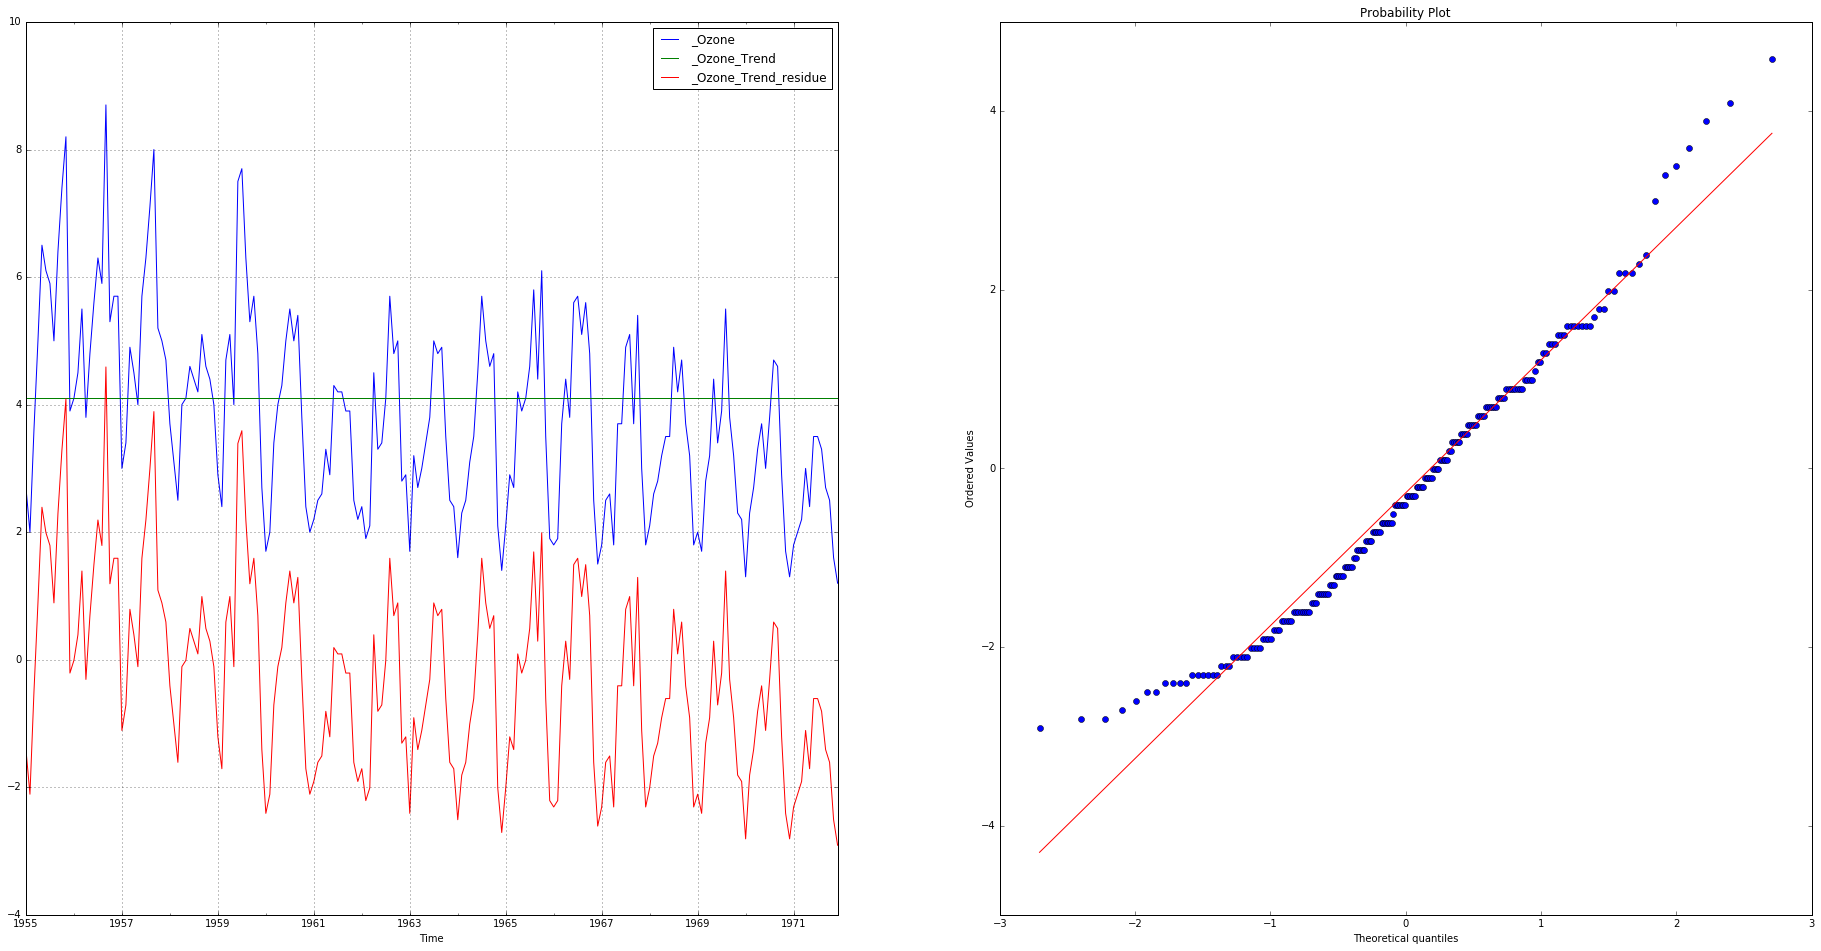

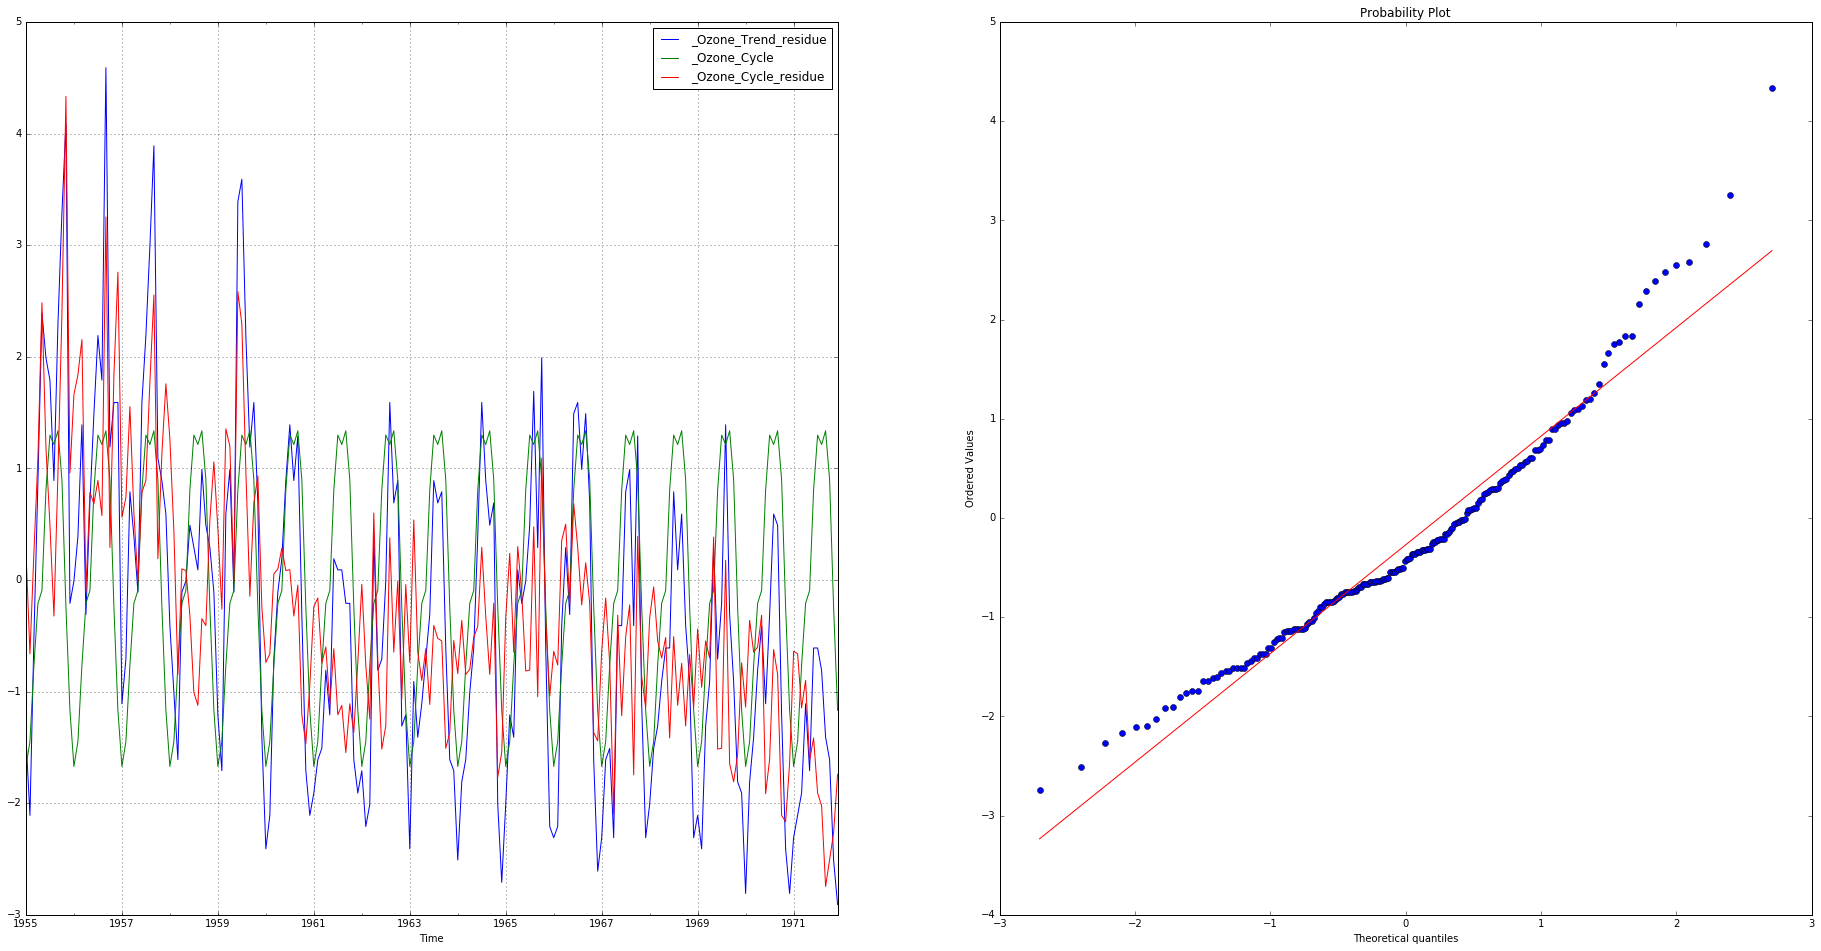

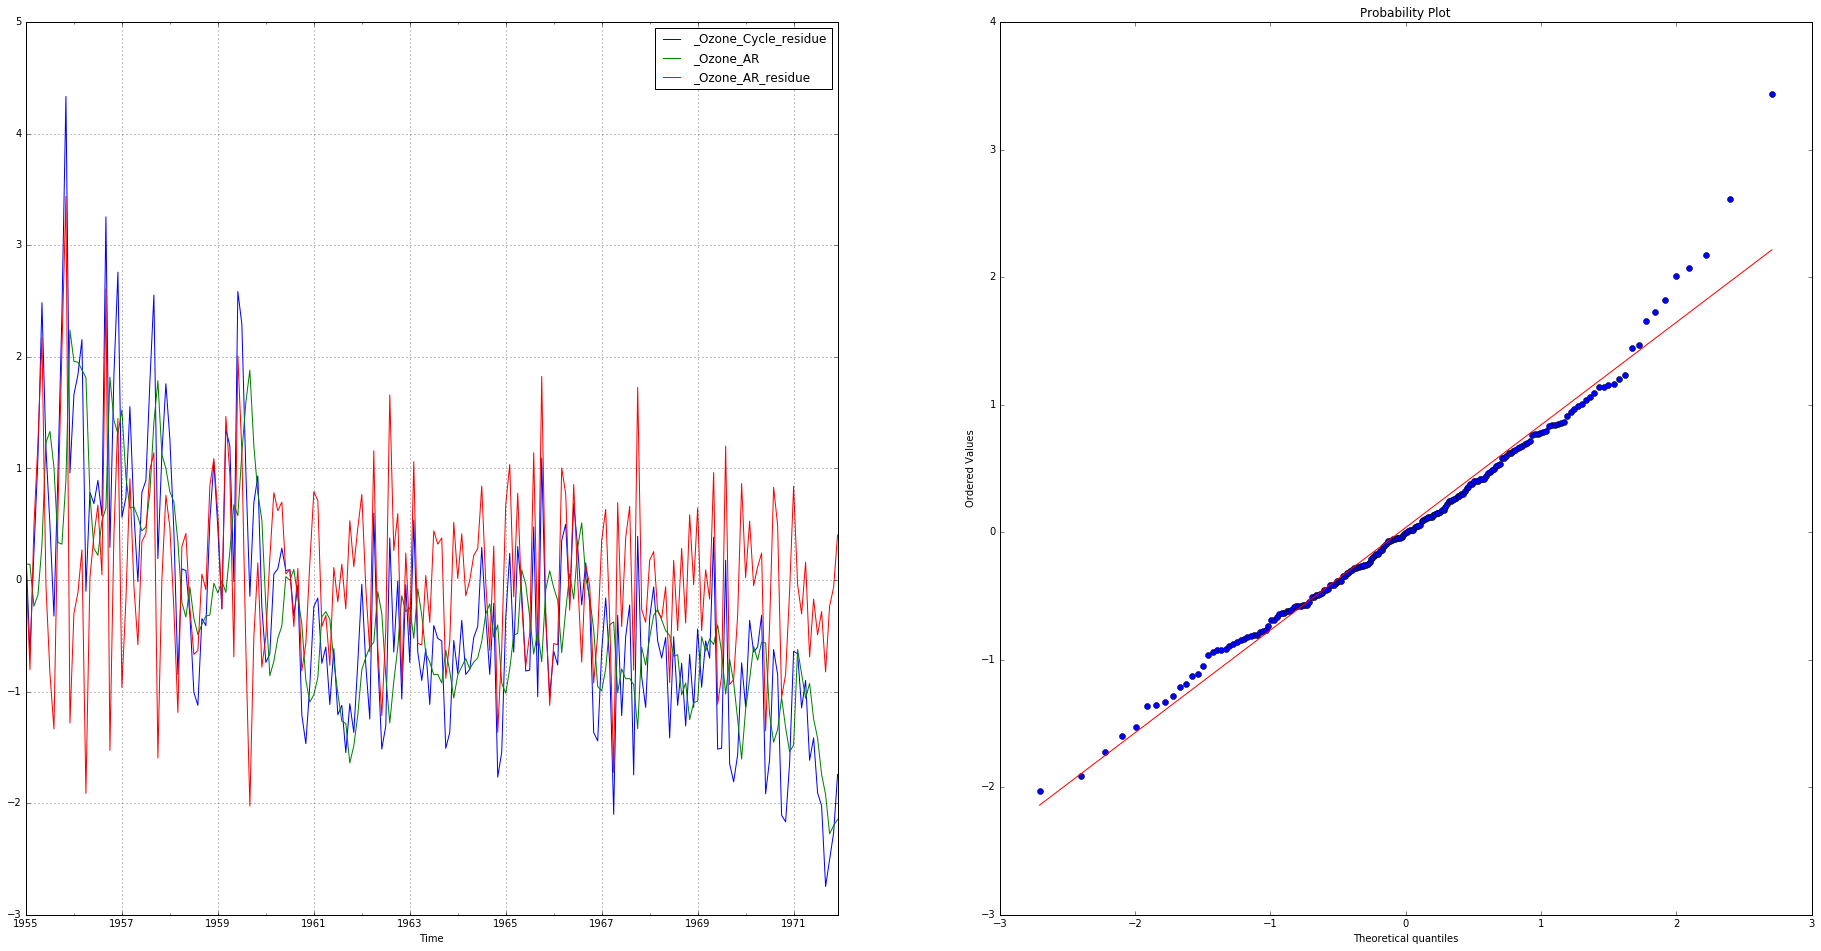

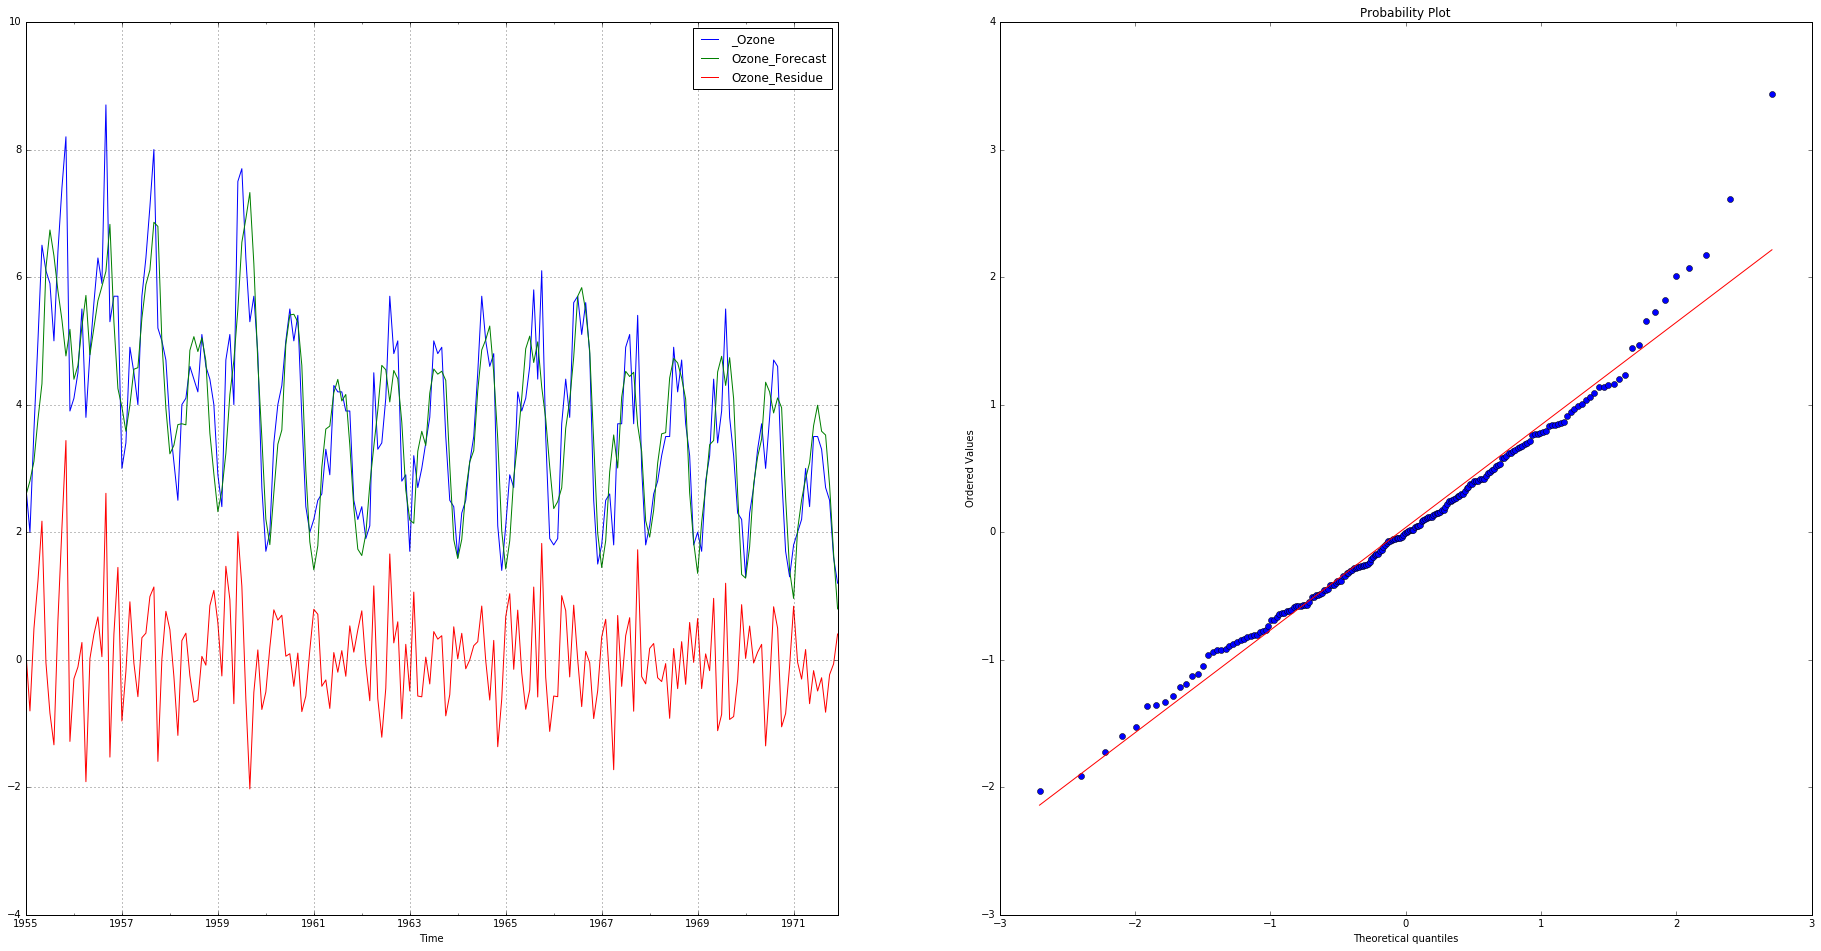

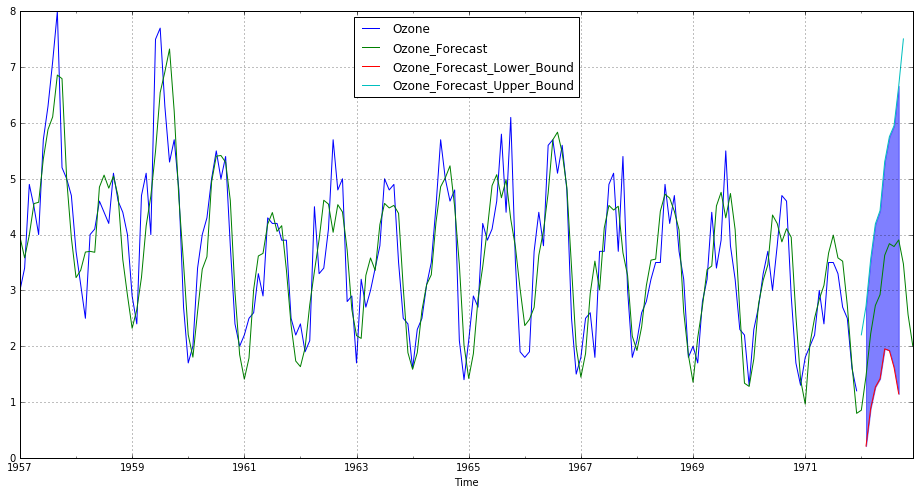

In [13]:
lEngine.standrdPlots()

In [14]:
lEngine.mSignalDecomposition.mBestModel.mTimeInfo.mTimeDelta

Timedelta('30 days 10:25:15.789473')

In [15]:
dfapp = df.copy();

In [16]:
dfapp.head()

,Month,Ozone,Time
0,1955-01,2.7,1955-01-01
1,1955-02,2.0,1955-02-01
2,1955-03,3.6,1955-03-01
3,1955-04,5.0,1955-04-01
4,1955-05,6.5,1955-05-01


In [17]:
dfapp1 = lEngine.forecast(dfapp, 36);

In [18]:
dfapp1.head()

,Ozone,Time,_Ozone,row_number,Time_Normalized,_Ozone_ConstantTrend,_Ozone_ConstantTrend_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51),...,_Ozone_Cycle,_Ozone_Cycle_residue,_Ozone_AR,_Ozone_AR_residue,_Ozone_TransformedForecast,_Ozone_TransformedResidue,Ozone_Forecast,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound
0,2.7,1955-01-01,2.7,0,0.000000,4.10915,-1.40915,-1.670689,0.261538,0.141487,...,-1.670689,0.261538,0.141487,0.120051,2.579949,0.120051,2.579949,0.120051,NaN,NaN
1,2.0,1955-02-01,2.0,1,0.006701,4.10915,-2.10915,-1.447612,-0.661538,0.141487,...,-1.447612,-0.661538,0.141487,-0.803026,2.803026,-0.803026,2.803026,-0.803026,NaN,NaN
2,3.6,1955-03-01,3.6,2,0.012754,4.10915,-0.50915,-0.762996,0.253846,-0.234731,...,-0.762996,0.253846,-0.234731,0.488577,3.111423,0.488577,3.111423,0.488577,NaN,NaN
3,5.0,1955-04-01,5.0,3,0.019455,4.10915,0.89085,-0.209150,1.100000,-0.132631,...,-0.209150,1.100000,-0.132631,1.232631,3.767369,1.232631,3.767369,1.232631,NaN,NaN
4,6.5,1955-05-01,6.5,4,0.025940,4.10915,2.39085,-0.093766,2.484615,0.311920,...,-0.093766,2.484615,0.311920,2.172695,4.327305,2.172695,4.327305,2.172695,NaN,NaN


In [19]:
dfapp1.tail(20)

,Ozone,Time,_Ozone,row_number,Time_Normalized,_Ozone_ConstantTrend,_Ozone_ConstantTrend_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51),...,_Ozone_Cycle,_Ozone_Cycle_residue,_Ozone_AR,_Ozone_AR_residue,_Ozone_TransformedForecast,_Ozone_TransformedResidue,Ozone_Forecast,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound
220,NaN,1973-05-01,3.601028,220,1.447255,4.10915,-0.508123,-0.093766,-0.414357,-0.414357,...,-0.093766,-0.414357,-0.414357,0.000000e+00,3.601028,0.000000,3.601028,0.000000,NaN,NaN
221,NaN,1973-06-01,4.182711,221,1.453956,4.10915,0.073561,0.806234,-0.732674,-0.732674,...,0.806234,-0.732674,-0.732674,3.330669e-16,4.182711,0.000000,4.182711,0.000000,NaN,NaN
222,NaN,1973-07-01,4.475823,222,1.460441,4.10915,0.366672,1.298542,-0.931870,-0.931870,...,1.298542,-0.931870,-0.931870,-2.220446e-16,4.475823,0.000000,4.475823,0.000000,NaN,NaN
223,NaN,1973-08-01,4.373968,223,1.467142,4.10915,0.264818,1.213927,-0.949109,-0.949109,...,1.213927,-0.949109,-0.949109,4.440892e-16,4.373968,0.000000,4.373968,0.000000,NaN,NaN
224,NaN,1973-09-01,4.560535,224,1.473843,4.10915,0.451385,1.337004,-0.885618,-0.885618,...,1.337004,-0.885618,-0.885618,0.000000e+00,4.560535,0.000000,4.560535,0.000000,NaN,NaN
225,NaN,1973-10-01,3.970060,225,1.480329,4.10915,-0.139090,0.899183,-1.038273,-1.038273,...,0.899183,-1.038273,-1.038273,-4.440892e-16,3.970060,0.000000,3.970060,0.000000,NaN,NaN
226,NaN,1973-11-01,2.961759,226,1.487030,4.10915,-1.147391,-0.242484,-0.904907,-0.904907,...,-0.242484,-0.904907,-0.904907,0.000000e+00,2.961759,0.000000,2.961759,0.000000,NaN,NaN
227,NaN,1973-12-01,2.343474,227,1.493515,4.10915,-1.765676,-1.167484,-0.598193,-0.598193,...,-1.167484,-0.598193,-0.598193,-2.220446e-16,2.343474,0.000000,2.343474,0.000000,NaN,NaN
228,NaN,1974-01-01,2.234247,228,1.500216,4.10915,-1.874903,-1.670689,-0.204214,-0.204214,...,-1.670689,-0.204214,-0.204214,0.000000e+00,2.234247,0.000000,2.234247,0.000000,NaN,NaN
229,NaN,1974-02-01,2.658737,229,1.506917,4.10915,-1.450413,-1.447612,-0.002801,-0.002801,...,-1.447612,-0.002801,-0.002801,0.000000e+00,2.658737,0.000000,2.658737,0.000000,NaN,NaN


In [20]:
#trdec.mTimeInfo.mTimeDelta

In [21]:
#trdec.mBestModelCycle.mDefaultValue

In [22]:
delta1 = np.mean(df['Time'] - df['Time'].shift(1))
delta1

Timedelta('30 days 10:24:14.187192')

In [23]:
delta1.days

30

In [24]:
import datetime as dt

#delta1/dt.timedelta(month = 1)

In [25]:
from dateutil import relativedelta
from datetime import datetime

date1 = datetime.strptime(str('2011-08-15 12:00:00'), '%Y-%m-%d %H:%M:%S')
date2 = datetime.strptime(str('2012-02-15'), '%Y-%m-%d')
r = relativedelta.relativedelta(date1, date2)

In [26]:
r.months


-5

In [27]:
r.weekday

In [28]:
dfapp.tail()

,Month,Ozone,Time
199,1971-08,3.3,1971-08-01
200,1971-09,2.7,1971-09-01
201,1971-10,2.5,1971-10-01
202,1971-11,1.6,1971-11-01
203,1971-12,1.2,1971-12-01


In [29]:
lDecomp = lEngine.mSignalDecomposition

In [30]:
dfapp1 = lDecomp.forecast(dfapp, 36);
dfapp2 = dfapp1;
dfapp2['Ozone'] = df['Ozone']

In [31]:
dfapp1.tail(15)

,Ozone,Time,_Ozone,row_number,Time_Normalized,_Ozone_ConstantTrend,_Ozone_ConstantTrend_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51),...,_Ozone_Cycle,_Ozone_Cycle_residue,_Ozone_AR,_Ozone_AR_residue,_Ozone_TransformedForecast,_Ozone_TransformedResidue,Ozone_Forecast,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound
225,NaN,1973-10-01,3.970060,225,1.480329,4.10915,-0.139090,0.899183,-1.038273,-1.038273,...,0.899183,-1.038273,-1.038273,-4.440892e-16,3.970060,0.000000,3.970060,0.000000,NaN,NaN
226,NaN,1973-11-01,2.961759,226,1.487030,4.10915,-1.147391,-0.242484,-0.904907,-0.904907,...,-0.242484,-0.904907,-0.904907,0.000000e+00,2.961759,0.000000,2.961759,0.000000,NaN,NaN
227,NaN,1973-12-01,2.343474,227,1.493515,4.10915,-1.765676,-1.167484,-0.598193,-0.598193,...,-1.167484,-0.598193,-0.598193,-2.220446e-16,2.343474,0.000000,2.343474,0.000000,NaN,NaN
228,NaN,1974-01-01,2.234247,228,1.500216,4.10915,-1.874903,-1.670689,-0.204214,-0.204214,...,-1.670689,-0.204214,-0.204214,0.000000e+00,2.234247,0.000000,2.234247,0.000000,NaN,NaN
229,NaN,1974-02-01,2.658737,229,1.506917,4.10915,-1.450413,-1.447612,-0.002801,-0.002801,...,-1.447612,-0.002801,-0.002801,0.000000e+00,2.658737,0.000000,2.658737,0.000000,NaN,NaN
230,NaN,1974-03-01,3.326651,230,1.512970,4.10915,-0.782499,-0.762996,-0.019502,-0.019502,...,-0.762996,-0.019502,-0.019502,0.000000e+00,3.326651,0.000000,3.326651,0.000000,NaN,NaN
231,NaN,1974-04-01,3.836049,231,1.519671,4.10915,-0.273101,-0.209150,-0.063951,-0.063951,...,-0.209150,-0.063951,-0.063951,-5.551115e-17,3.836049,0.000000,3.836049,0.000000,NaN,NaN
232,NaN,1974-05-01,3.830630,232,1.526157,4.10915,-0.278520,-0.093766,-0.184755,-0.184755,...,-0.093766,-0.184755,-0.184755,2.775558e-17,3.830630,0.000000,3.830630,0.000000,NaN,NaN
233,NaN,1974-06-01,4.454764,233,1.532858,4.10915,0.345614,0.806234,-0.460620,-0.460620,...,0.806234,-0.460620,-0.460620,3.330669e-16,4.454764,0.000000,4.454764,0.000000,NaN,NaN
234,NaN,1974-07-01,4.731885,234,1.539343,4.10915,0.622735,1.298542,-0.675807,-0.675807,...,1.298542,-0.675807,-0.675807,-2.220446e-16,4.731885,0.000000,4.731885,0.000000,NaN,NaN


In [32]:
dfapp1.describe()

,Ozone,_Ozone,row_number,Time_Normalized,_Ozone_ConstantTrend,_Ozone_ConstantTrend_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue,_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51),_Ozone_ConstantTrend_residue_Seasonal_MonthOfYear_residue_MLP(51)_residue,...,_Ozone_Cycle,_Ozone_Cycle_residue,_Ozone_AR,_Ozone_AR_residue,_Ozone_TransformedForecast,_Ozone_TransformedResidue,Ozone_Forecast,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound
count,204.000000,240.000000,240.00000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,12.000000,12.000000
mean,3.835784,3.758242,119.50000,0.786145,4.109150e+00,-0.350908,-0.003274,-0.347634,-0.381532,0.033898,...,-0.003274,-0.347634,-0.381532,0.033898,3.724344,0.033898,3.724344,0.033898,-0.054176,5.620173
std,1.495228,1.441084,69.42622,0.456804,8.900346e-16,1.441084,1.056921,1.057402,0.827585,0.745011,...,1.056921,1.057402,0.827585,0.745011,1.315879,0.745011,1.315879,0.745011,2.537772,2.444325
min,1.200000,0.853364,0.00000,0.000000,4.109150e+00,-3.255786,-1.670689,-2.746154,-2.274348,-2.026227,...,-1.670689,-2.746154,-2.274348,-2.026227,0.796675,-2.026227,0.796675,-2.026227,-6.472498,2.203109
25%,2.600000,2.600000,59.75000,0.393050,4.109150e+00,-1.509150,-0.864118,-1.042788,-0.906137,-0.416839,...,-0.864118,-1.042788,-0.906137,-0.416839,2.732796,-0.416839,2.732796,-0.416839,-0.511775,4.032679
50%,3.750000,3.700000,119.50000,0.786316,4.109150e+00,-0.409150,-0.151458,-0.543910,-0.518504,0.000000,...,-0.151458,-0.543910,-0.518504,0.000000,3.693467,0.000000,3.693467,0.000000,1.015992,5.528884
75%,4.825000,4.700000,179.25000,1.179367,4.109150e+00,0.590850,0.977869,0.180609,-0.057490,0.414728,...,0.977869,0.180609,-0.057490,0.414728,4.587987,0.414728,4.587987,0.414728,1.466851,6.875519
max,8.700000,8.700000,239.00000,1.572417,4.109150e+00,4.590850,1.337004,4.333333,2.239536,3.436709,...,1.337004,4.333333,2.239536,3.436709,7.326227,3.436709,7.326227,3.436709,1.952849,10.489833
